<a href="https://colab.research.google.com/github/jaehyeon1229/Kangnam/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_train_test_201704240%EC%A0%84%EC%9E%AC%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
from scipy import stats
from wordcloud import WordCloud, STOPWORDS
import matplotlib.font_manager as fm
import matplotlib as mpl
import matplotlib.pylab as plt 
import matplotlib.font_manager as fm
from sklearn.linear_model import LinearRegression

mpl.rc('font',family= 'Malgun Gothic')

#1. 데이터확인 및 전처리#

In [2]:
# 가까운 미래에 가격이 어떻게 변할지 예측하는 것이 목표
# 가장 많은 매출을 기록하는 것으로 보이는 화장품
shop = pd.read_csv('/content/전국면세점_train.csv')
shop_test = pd.read_csv('/content/전국면세점_test.csv')
shop.head(10)

,time,화장품,향수,가방류,시계,주류,담배,귀금속류,의류,인홍삼류,안경류,전자제품류,식품류,민예품류,신발류,기타
0,2018-06-19,11582,664,1720,1150,347,629,974,609,293,419,232,202,25,276,450
1,2018-07-19,12013,702,1725,1300,331,574,1087,598,295,397,229,204,21,234,438
2,2018-08-19,13759,696,1794,1267,347,575,1075,629,296,334,200,208,19,219,427
3,2018-09-19,14697,656,1652,1231,349,537,979,736,307,255,170,206,18,233,396
4,2018-10-19,14130,643,1620,1223,384,563,966,775,287,241,175,218,18,235,395
5,2018-11-19,14883,677,1774,1195,379,561,1059,821,279,205,174,206,16,255,398
6,2018-12-19,14285,830,1830,1377,409,557,1106,836,301,219,183,209,15,271,418
7,2019-07-19,12013,702,1725,1300,331,574,1087,598,295,397,229,204,21,234,438
8,2019-08-19,13759,696,1794,1267,347,575,1075,629,296,334,200,208,19,219,427
9,2019-09-19,14697,656,1652,1231,349,537,979,736,307,255,170,206,18,233,396


In [3]:
# 결측치 확인
shop.isnull().sum()

time     0
화장품      0
향수       0
가방류      0
시계       0
주류       0
담배       0
귀금속류     0
의류       0
인홍삼류     0
안경류      0
전자제품류    0
식품류      0
민예품류     0
신발류      0
기타       0
dtype: int64

In [4]:
# 각 열들의 고유값 정보 출력
shop.nunique()

time     42
화장품      35
향수       35
가방류      35
시계       35
주류       32
담배       32
귀금속류     35
의류       35
인홍삼류     28
안경류      35
전자제품류    32
식품류      25
민예품류     12
신발류      32
기타       31
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

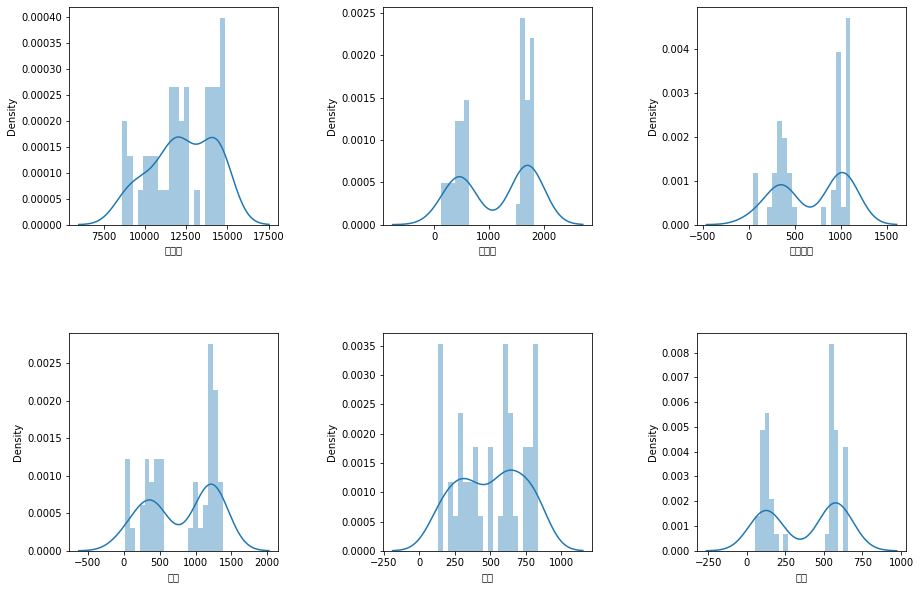

In [8]:
# corr = shop.drop(columns="기타").corr() # 기타칼럼삭제
# 주력상품 평균 판매량 분포 시각화
plt.figure(1 , figsize = (15 , 10))
n = 0 
for x in ['화장품' , '가방류' , '귀금속류', '시계', '의류', '담배']:
    n += 1
    plt.subplot(2 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(shop[x] , bins = 20)
plt.show()

In [7]:
# 주력 판매 제품6개 항목을 데이터셋으로 나누기
shop_prd = shop[['time', '화장품', '가방류', '귀금속류', '시계', '의류', '담배']]
shop_prd = shop_prd.set_index('time')
shop_date = shop[['time']]
X_train, X_test, y_train, y_test = train_test_split(shop_prd, 
                                                    shop_date, 
                                                    test_size = 0.2, 
                                                    shuffle = False, 
                                                    random_state = 21)

print('원 데이터셋의 shape: ',shop_prd.shape)
print('레이블 데이터셋의 shape: ', shop_date.shape)
print('학습셋의 shape: ', X_train.shape)
print('검증셋의 shape: ', X_test.shape)
print('학습셋 label의 shape: ', y_train.shape)
print('검증셋 label의 shape: ', y_test.shape)

원 데이터셋의 shape:  (48, 6)
레이블 데이터셋의 shape:  (48, 1)
학습셋의 shape:  (38, 6)
검증셋의 shape:  (10, 6)
학습셋 label의 shape:  (38, 1)
검증셋 label의 shape:  (10, 1)


In [9]:
# 데이트타임 형태로 변환하기 
#pd.Timestamp.max
shop = pd.read_csv('/content/전국면세점_train.csv')
shop_prd = shop[['time', '화장품', '가방류', '귀금속류', '시계', '의류', '담배']]
shop_prd.astype({'time' : 'str'})
shop_prd['time'] = pd.to_datetime(shop_prd['time'])  

<ipython-input-9-2970ad149f86>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shop_prd['time'] = pd.to_datetime(shop_prd['time'])


#2. 화장품 및 주요 품목 시각화#

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text

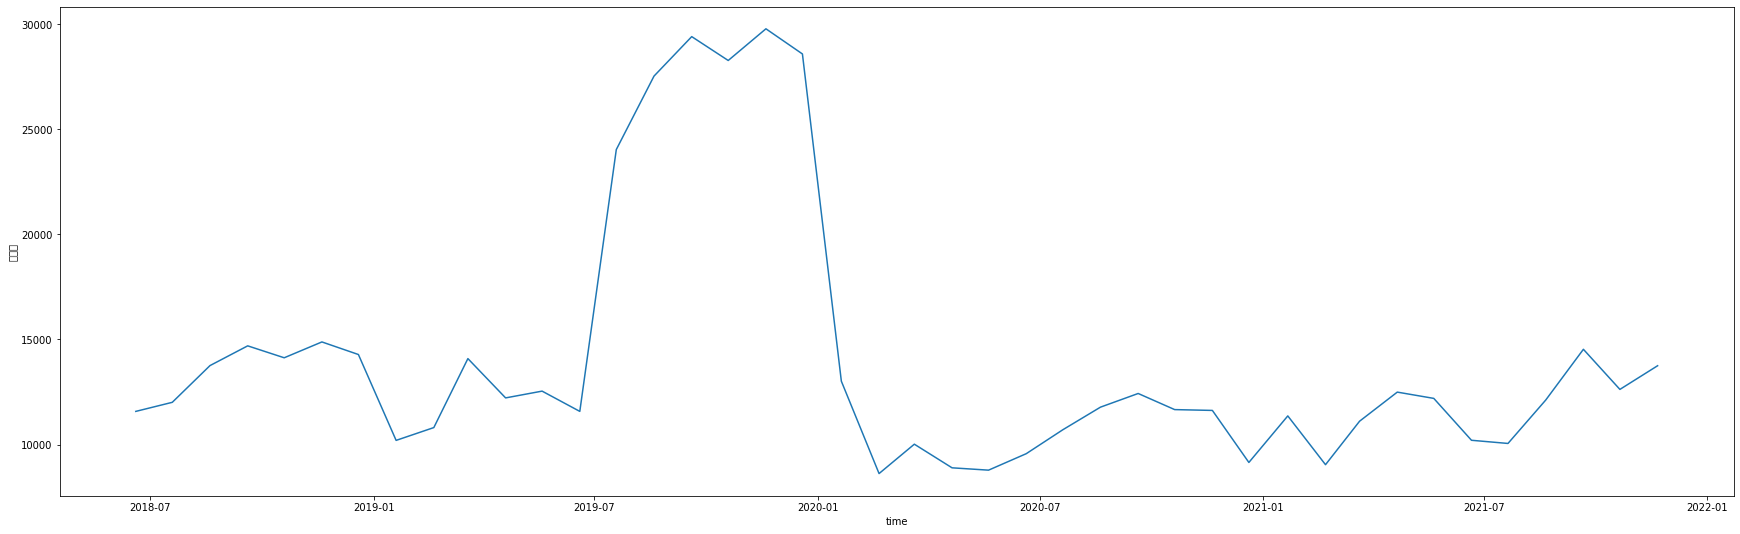

In [10]:
# 월별 매출량 확인: 화장품
fig = plt.figure(figsize=(30, 9))
p1 = pd.pivot_table(data=shop_prd,
                    index='time',
                    values='화장품', aggfunc='sum')
sns.lineplot(data=p1, x='time', y='화장품')

In [11]:
p1

,화장품
time,
2018-06-19,11582
2018-07-19,12013
2018-08-19,13759
2018-09-19,14697
2018-10-19,14130
2018-11-19,14883
2018-12-19,14285
2019-01-19,10204
2019-02-19,10813


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text

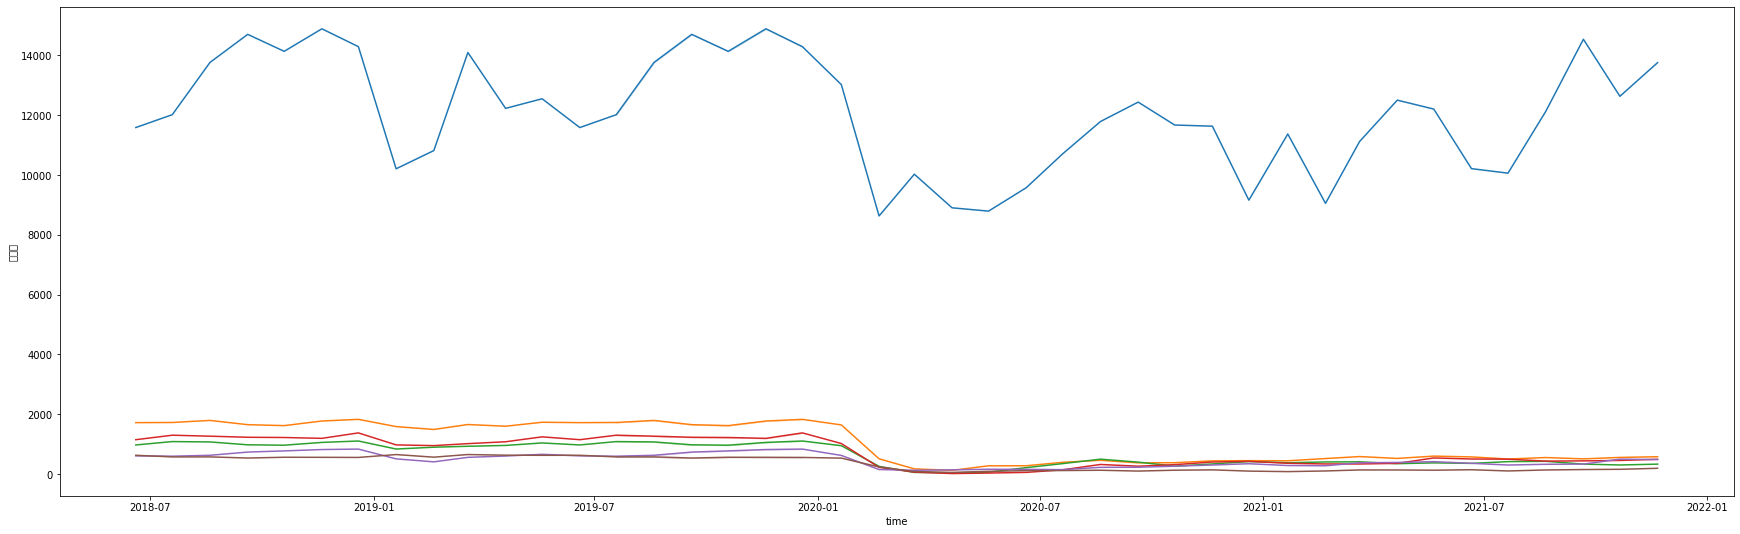

In [12]:
#  나머지 5품목별 매출량 확인
fig = plt.figure(figsize=(30, 9))
sns.lineplot(data=shop_prd, x='time', y='화장품')
sns.lineplot(data=shop_prd, x='time', y='가방류')
sns.lineplot(data=shop_prd, x='time', y='귀금속류')
sns.lineplot(data=shop_prd, x='time', y='시계')
sns.lineplot(data=shop_prd, x='time', y='의류')
sns.lineplot(data=shop_prd, x='time', y='담배')

#3. 모델링

##3-1. 아리마 ARIMA 모델 (Auto Regressive Integrated Moving Average Model)
- 단기예측에 사용하며 계절성을 가진다

AR: 이전의 자료가 현재시점의 데이터에 영향을 주는 자기회귀모델(p), 특정 구간내 데이터간 상관관계(ACF), 과거의 데이터가 지속적으로 영향을 줄 때 쓰는 함수(PACF)

MA: 일정 구간 데이터의 평균을 계산해, 미래를 예측하는 모델

Difference: 차분


In [13]:
# float데이터 타입으로 일주일 단위로 모델 묶기
y = p1['화장품'].resample('1W').mean()
y.isnull().sum()

137

In [14]:
# 기존의 월 단위 데이터는 50개정도 밖에 되지 않아 ARIMA에 적용이 되지 않음. 그래서 주 단위로 설정 뒤 데이터를 채워주었다
y1 = y.fillna( method='ffill')
y1

time
2018-06-24    11582.0
2018-07-01    11582.0
2018-07-08    11582.0
2018-07-15    11582.0
2018-07-22    12013.0
               ...   
2021-10-24    12627.0
2021-10-31    12627.0
2021-11-07    12627.0
2021-11-14    12627.0
2021-11-21    13752.0
Freq: W-SUN, Name: 화장품, Length: 179, dtype: float64

###3-2. 시계열 분해###

확인 필요한 부분 3가지

1. 계절성(Seasnality)

2. 트렌드(Trend)

3. 사이클, 불규칙적인 변동(Resdiual)

In [15]:
# 그래프 사이즈 조절
from pylab import rcParams
rcParams['figure.figsize'] = 15,10

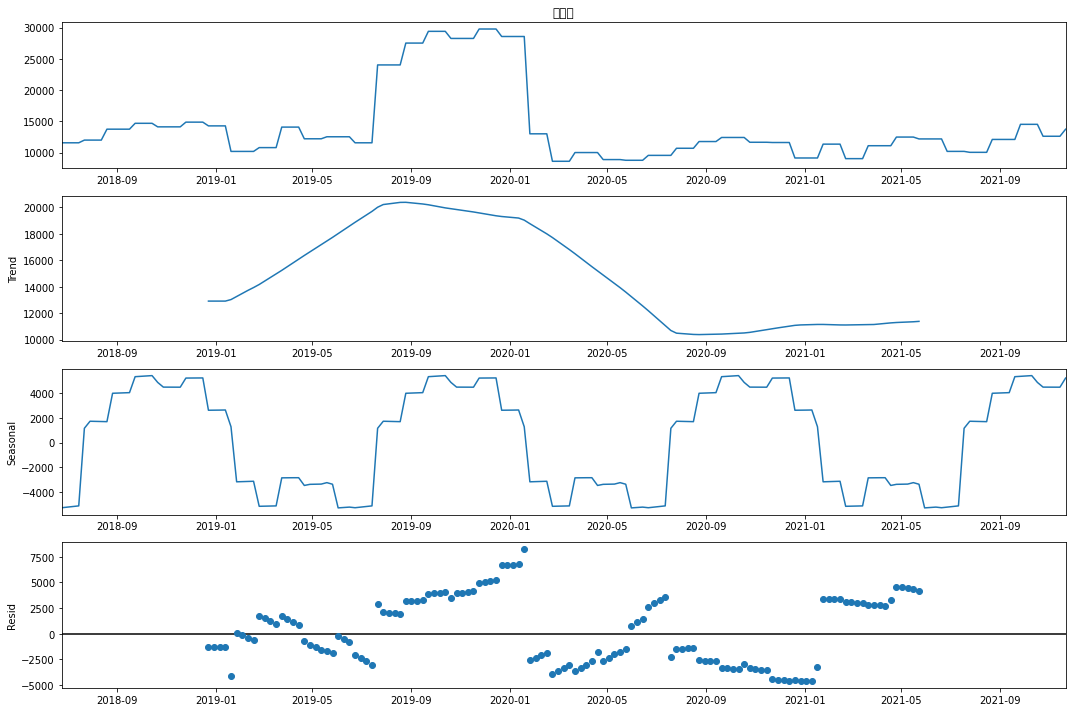

In [16]:
# 시계열 분해
model1 = tsa.seasonal_decompose(y1, model='additive')
fig = model1.plot()
plt.show()

###3-3. 파라미터 분석###

In [17]:
import itertools
import statsmodels.api as sm

In [18]:
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [19]:
param_list = []
param_seasonal_list = []
results_AIC_list = []

##3-4 SARIMA 모델


In [20]:
for param in pdq:
  for param_seasonal in seasonal_pdq:
    try:
      mod = tsa.statespace.SARIMAX(y1,order=param,
                                  seasonal_order=param_seasonal,
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)
      results = mod.fit()
      param_list.append(param)
      param_seasonal_list.append(param_seasonal)
      results_AIC_list.append(results.aic)
    except:
      continue

In [21]:
# 최적의 성능 모델
ARIMA_list = pd.DataFrame({'Parameter':param_list,'Seasonal':param_seasonal_list,'AIC':results_AIC_list})
ARIMA_list.to_excel('arima_model_list.xlsx')

In [22]:
ARIMA_list.sort_values(by='AIC').head()  # AIC가 가장 낮은 모델을 사용한다.

,Parameter,Seasonal,AIC
59,"(1, 1, 1)","(0, 1, 1, 12)",2745.182370
27,"(0, 1, 1)","(0, 1, 1, 12)",2745.221183
63,"(1, 1, 1)","(1, 1, 1, 12)",2747.164697
31,"(0, 1, 1)","(1, 1, 1, 12)",2747.210191
19,"(0, 1, 0)","(0, 1, 1, 12)",2760.237313


## SARIMA 모델평가

In [23]:
# SARIMA모델평가
mod = tsa.statespace.SARIMAX(y1,order=(1,1,1),
                                  seasonal_order=param_seasonal,
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)
results = mod.fit(trend='c',full_output=True, disp=True)
print(results.summary()) # 테이블 별로 살펴볼 수 있다. + .tables[1]

                                     SARIMAX Results                                      
Dep. Variable:                                화장품   No. Observations:                  179
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1368.582
Date:                            Fri, 09 Dec 2022   AIC                           2747.165
Time:                                    07:12:12   BIC                           2762.284
Sample:                                06-24-2018   HQIC                          2753.307
                                     - 11-21-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7627      0.242      3.152      0.002       0.288       1.237
ma.L1         -0.7269      0.273   

##3-5 ARIMA 모델


## ARIMA 모델 평가

In [34]:
# 모델 생성 및 평가: (1,1,1)에서 ma 값이 nan으로 나와서 두번째로 AIC가 낮은 (0,1,1)모델 선택
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(y1, order=(0,1,1))
model_fit = model.fit(trend='c',full_output=True, disp=True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                  D.화장품   No. Observations:                  178
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -1578.118
Method:                       css-mle   S.D. of innovations           1714.525
Date:                Fri, 09 Dec 2022   AIC                           3162.235
Time:                        08:06:28   BIC                           3171.781
Sample:                    07-01-2018   HQIC                          3166.106
                         - 11-21-2021                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.1910    128.507      0.095      0.924    -239.678     264.060
ma.L1.D.화장품 -2.463e-05      0.075     -0.000      1.000      -0.147       0.147
                                    Roots       

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)



In [25]:
pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 21.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  # Negative indices (that lie in the Index)


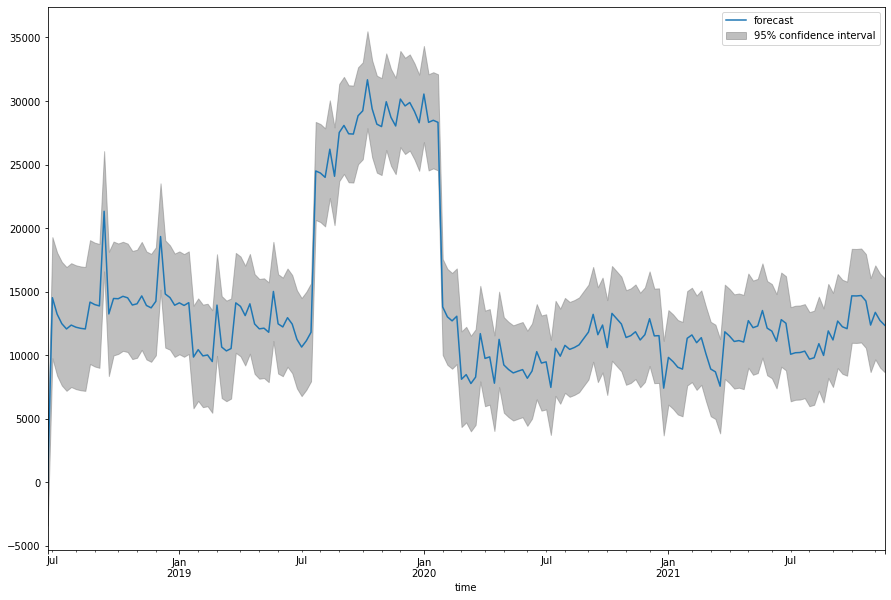

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text

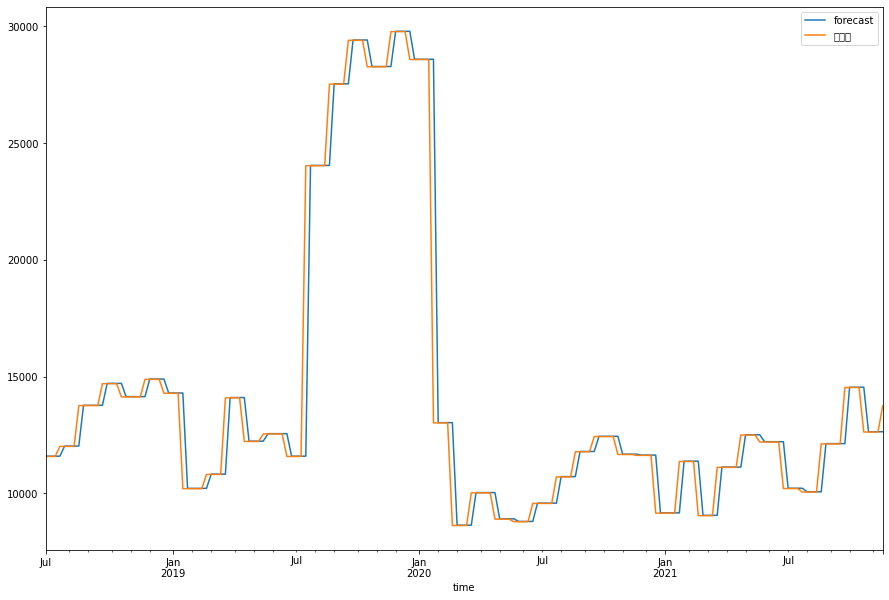

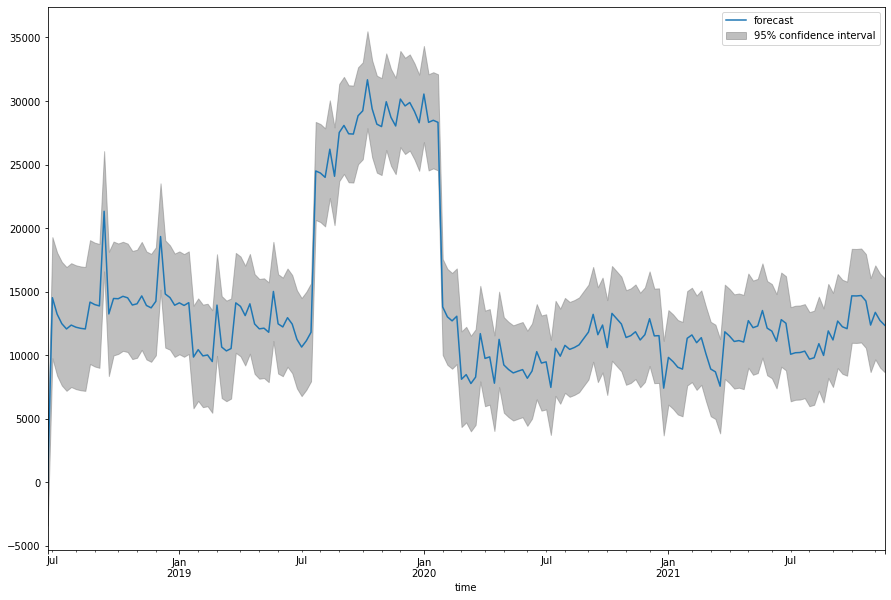

In [35]:
# SARIMA 모델 예측결과
# 잔차 시각화1
from statsmodels.graphics.tsaplots import plot_predict

plot_predict(results, dynamic=False)    # 1번째 그래프: SARIMA
model_fit.plot_predict()    # 2번째 그래프: ARIMA

# 잔차에 대한 변동성이 두 모델 모두 거의 일치하는 것을 볼 수 있다

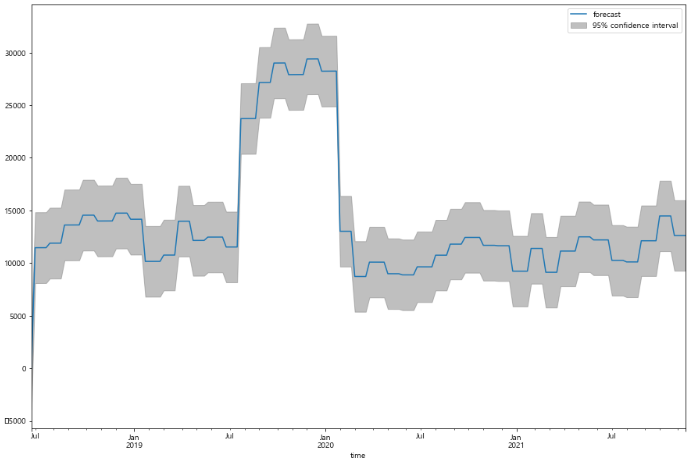

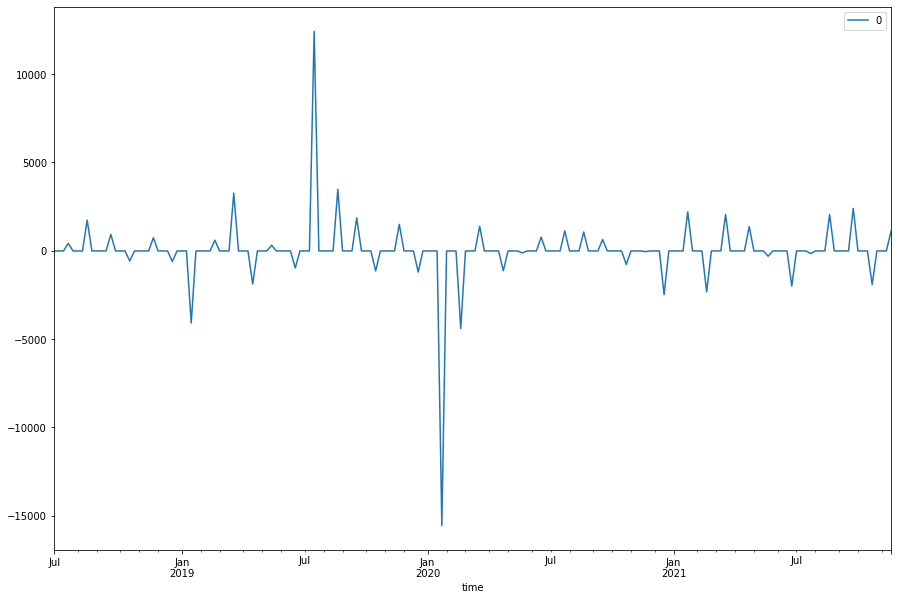

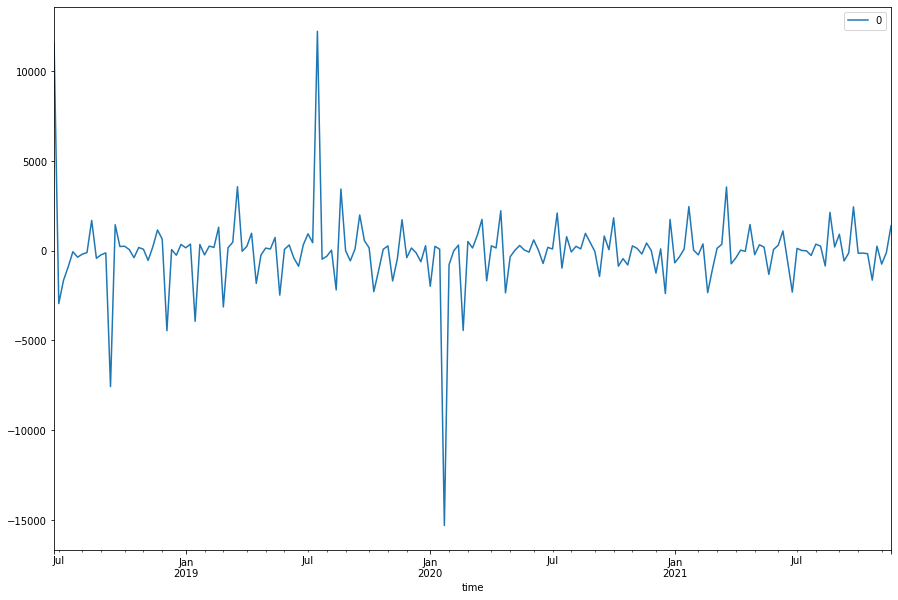

In [30]:
# 잔차의 변동 시각화2
residuals = pd.DataFrame(model_fit.resid)  # 1번째 그래프: ARIMA
residuals2 = pd.DataFrame(results.resid) # 2번째 그래프: SARIMA
residuals.plot()
residuals2.plot()

# 4. 예측 시각화

In [38]:
# 8개월 예측 데이터 만들기
forecast_data = model_fit.forecast(steps=8)
forecast_data

(array([13764.163608  , 13776.35461924, 13788.54563048, 13800.73664171,
        13812.92765295, 13825.11866418, 13837.30967542, 13849.50068666]),
 array([1714.52503199, 2424.67469893, 2969.59571423, 3428.98673317,
        3833.71899421, 4199.6252972 , 4536.11110393, 4849.30461587]),
 array([[10403.75629471, 17124.5709213 ],
        [ 9024.07953511, 18528.62970337],
        [ 7968.24498195, 19608.846279  ],
        [ 7080.04614123, 20521.42714219],
        [ 6298.97649744, 21326.87880845],
        [ 5594.0043331 , 22056.23299526],
        [ 4946.69528184, 22727.924069  ],
        [ 4345.03828948, 23353.96308383]]))

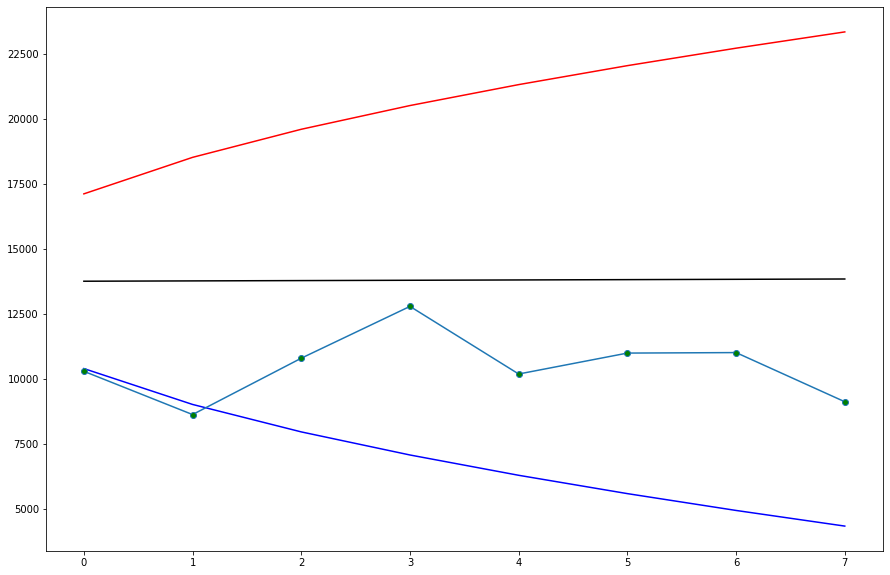

In [37]:
# 테스트 데이터셋 추가 

# 모델 예측 값
pred = forecast_data[0].tolist()

# 예측 최소/최대 값
pred_8_low=[]
pred_8_up=[]

for lower_upper in forecast_data[2]:
  lower = lower_upper[0]
  upper = lower_upper[1]
  pred_8_low.append(lower)
  pred_8_up.append(upper)

plt.plot(pred, color='black')
plt.plot(pred_8_low, color='blue')
plt.plot(pred_8_up, color='red')
plt.plot(shop_test['화장품'],marker='o',markerfacecolor='green' , label= 'actual sales')  # 실제 화장품 판매량